# 
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import power_transform
from scipy.stats import zscore
from sklearn.metrics import plot_roc_curve 

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

# 
These are the categorical columns in the given dataset

In [5]:
df.shape

(1000, 40)

# 
Dataset having 1000 rows and 40 columns

In [6]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

# 
The dataset contains integer, object and float type data

In [7]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

# 
These are the unique values present in each column

In [8]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

 #                                                                                                                       
Missing values present in _c39.Will drop the _c39 because there are no uniqe values and high null values 

In [9]:
df.drop(['_c39'],axis=1,inplace=True)

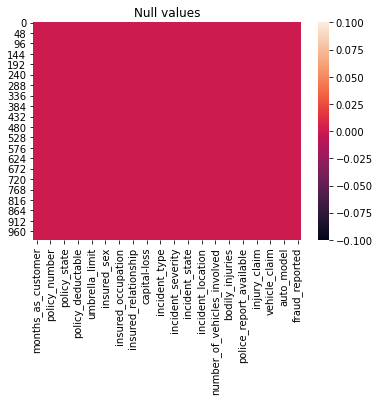

In [10]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

# 
All null values are removed from our data.

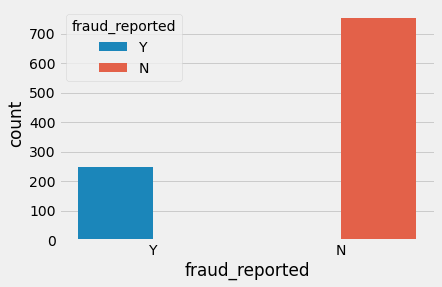

In [11]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')

# 
Fraud Reported 'No'count is higher then 'Yes'.

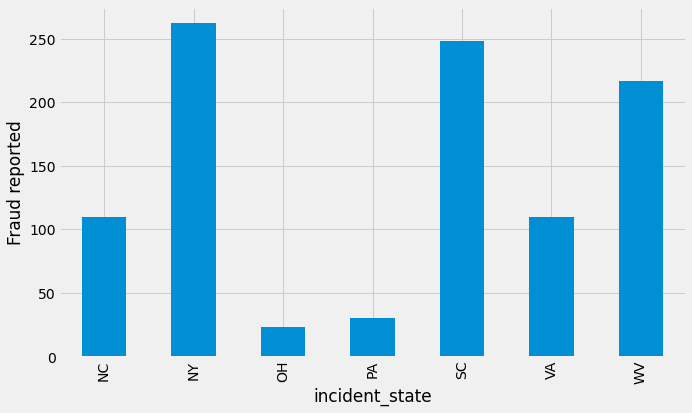

In [12]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

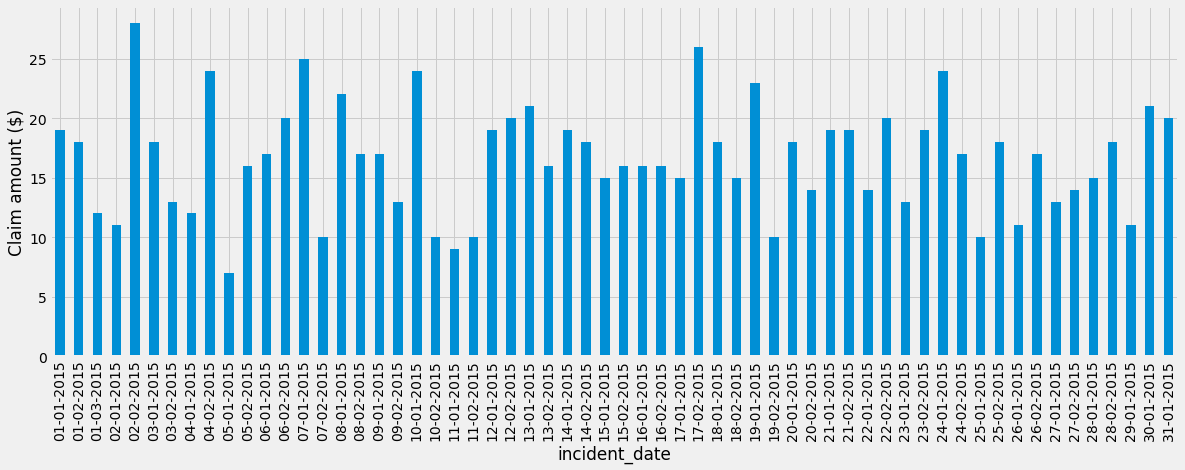

In [13]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

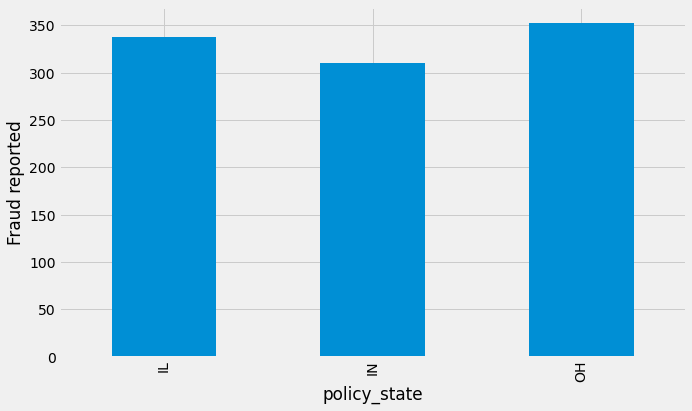

In [14]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

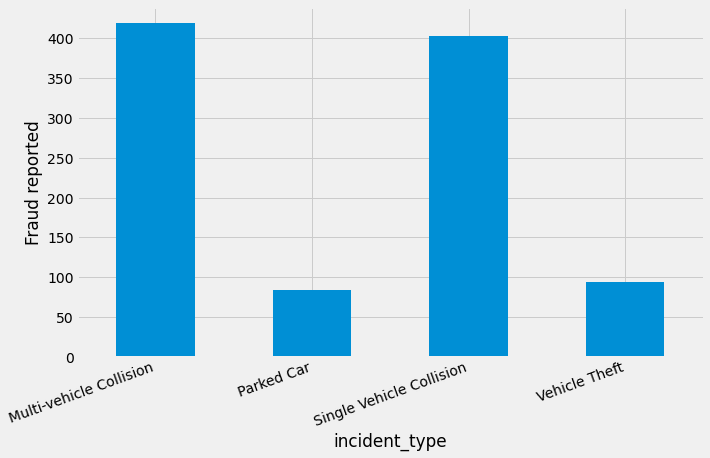

In [15]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

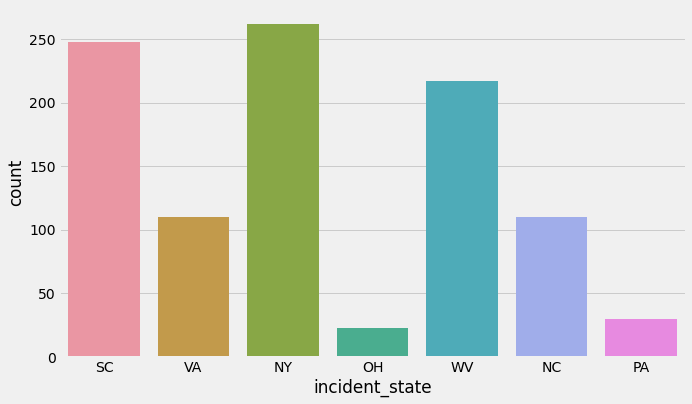

In [16]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_state', data=df)

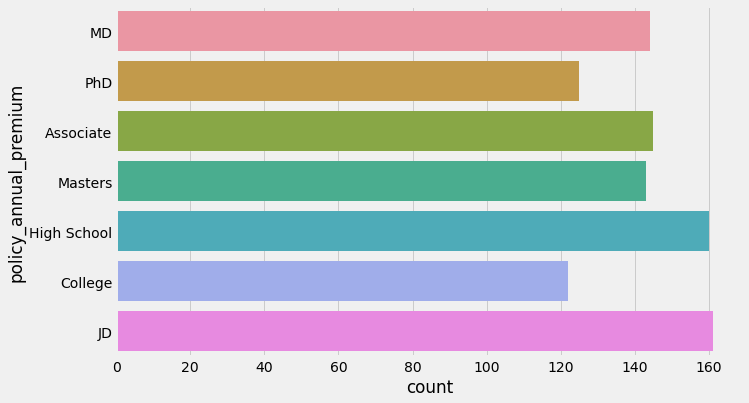

In [17]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'insured_education_level', data=df) 
ax.set_ylabel('policy_annual_premium')
plt.show()

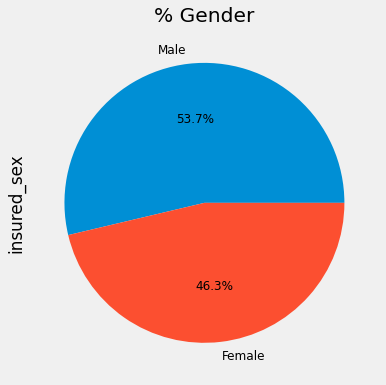

In [18]:
fig = plt.figure(figsize=(10,6))
ax = (df['insured_sex'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('% Gender')
plt.show()

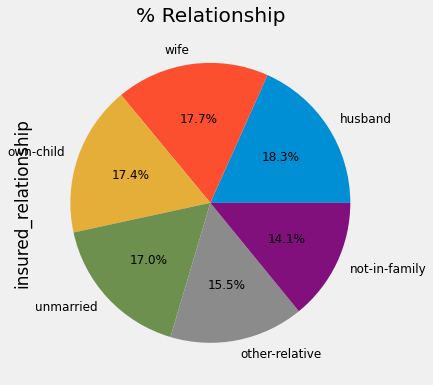

In [19]:
fig = plt.figure(figsize=(10,6))
ax = (df['insured_relationship'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('% Relationship')
plt.show()

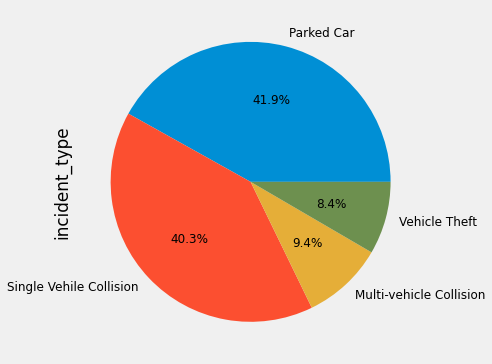

In [20]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_type'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],
         fontsize=12) 

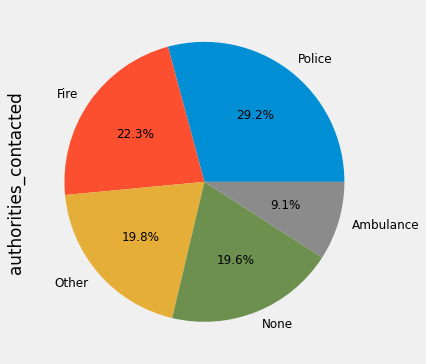

In [21]:
fig = plt.figure(figsize=(10,6))
ax = (df['authorities_contacted'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12) 

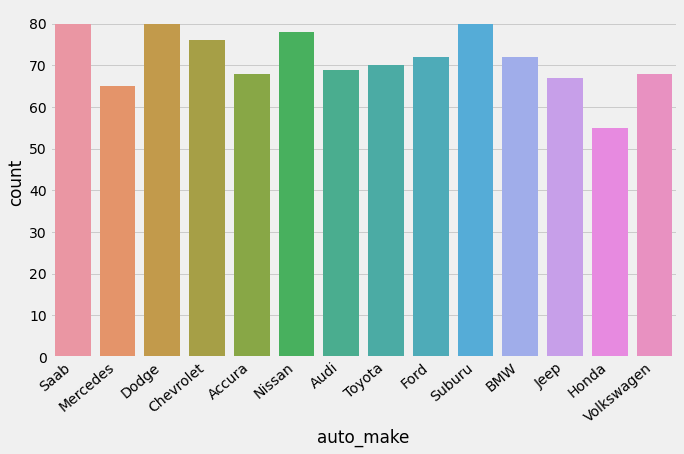

In [22]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='auto_make', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

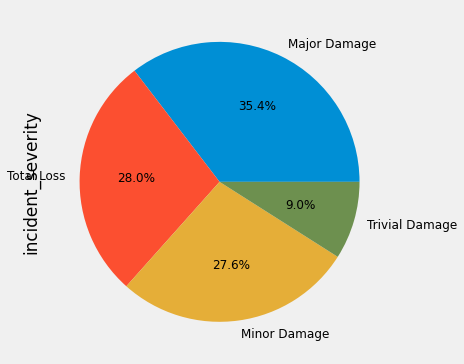

In [23]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_severity'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=12)  

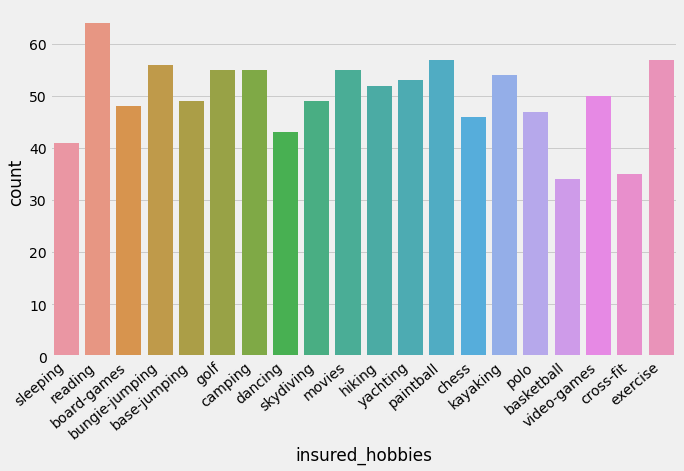

In [24]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_hobbies', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

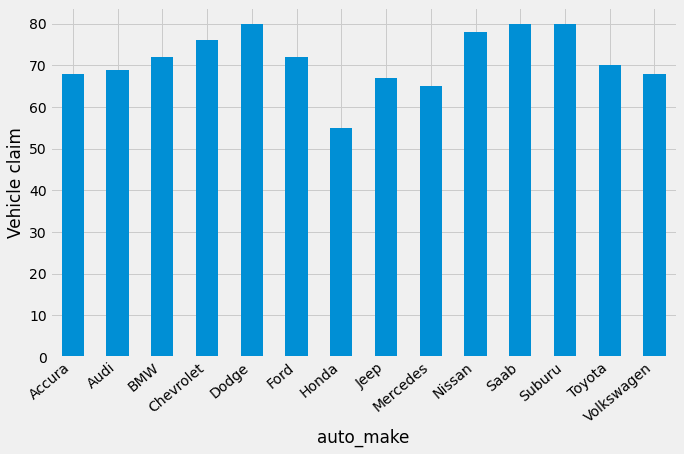

In [25]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

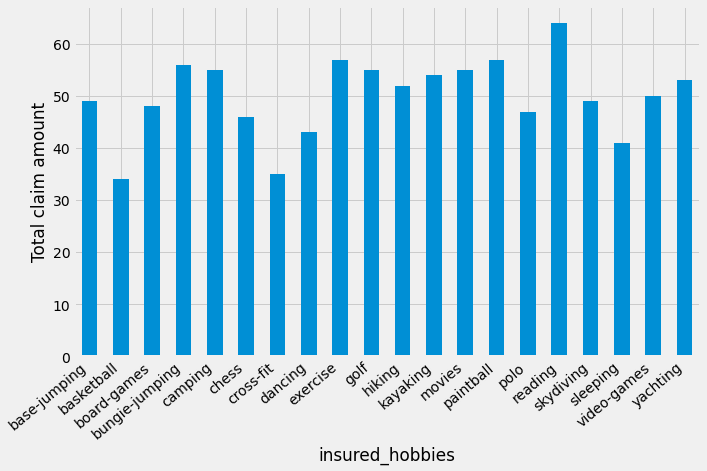

In [26]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('insured_hobbies').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Total claim amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [27]:
df = df.apply(LabelEncoder().fit_transform)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,299,29,480,532,2,1,1,732,1,486,...,2,2,563,258,512,545,10,1,9,1
1,212,23,257,821,1,1,2,396,5,519,...,0,0,44,46,45,38,8,12,12,1
2,123,10,672,186,2,0,2,740,5,6,...,3,1,143,337,104,116,4,30,12,0
3,239,22,140,766,0,1,2,743,6,812,...,2,1,451,245,249,521,3,34,19,1
4,212,25,286,181,0,2,1,902,6,850,...,1,1,81,70,36,66,0,31,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,19,935,487,2,2,1,577,1,19,...,1,0,705,624,379,664,6,6,11,0
996,266,22,101,129,0,0,1,765,1,813,...,3,0,760,630,608,714,13,28,20,0
997,119,15,902,509,2,1,0,691,3,181,...,3,2,507,324,330,554,11,19,1,0
998,377,43,500,573,0,2,2,652,5,157,...,1,2,224,168,170,256,1,5,3,0


# 
The categorical columns has been converted into numerical columns by using label encoding

In [28]:
print(df.corr())

                             months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.911296       0.059023   
age                                    0.911296  1.000000       0.061380   
policy_number                          0.059023  0.061380       1.000000   
policy_bind_date                       0.053206  0.056538       0.045938   
policy_state                          -0.000783 -0.014533       0.073149   
policy_csl                            -0.026295 -0.015185       0.038834   
policy_deductable                      0.016873  0.020561      -0.015075   
policy_annual_premium                  0.014294  0.017822       0.018033   
umbrella_limit                         0.017145  0.021924       0.013341   
insured_zip                            0.015904  0.013517      -0.000690   
insured_sex                            0.059153  0.073337       0.003588   
insured_education_level                0.000265  0.000969      -0.038415   
insured_occu

<function matplotlib.pyplot.show(close=None, block=None)>

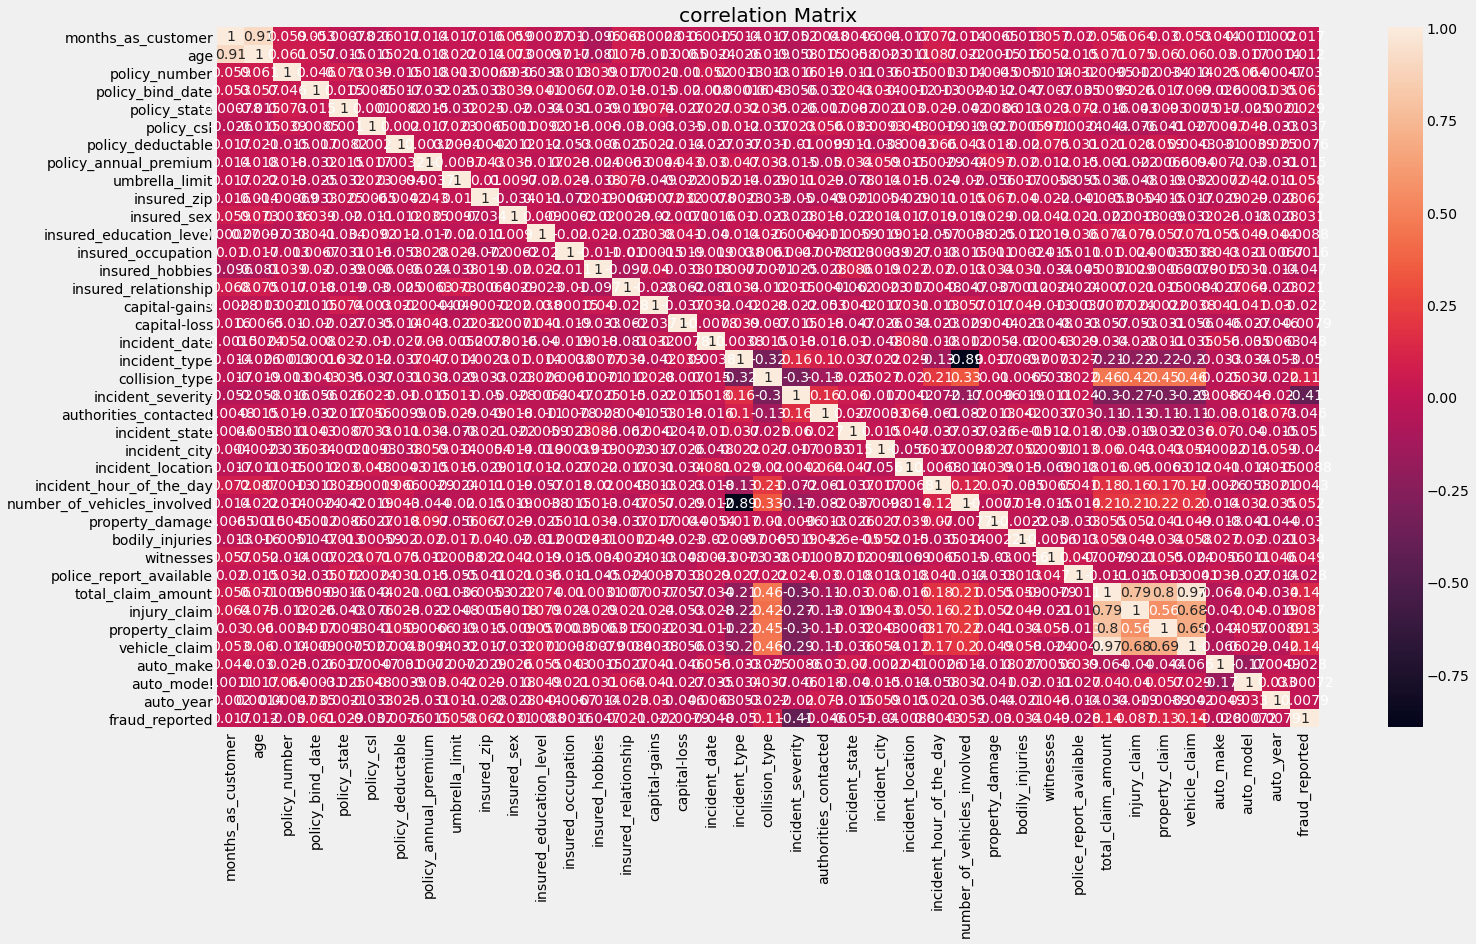

In [29]:
corr_mat=df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show

# 
Dark shades are highly correlated and light shades are very less correlated.

In [30]:
corr_matrix=df.corr()
corr_matrix["fraud_reported"].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.144769
total_claim_amount             0.140553
property_claim                 0.133952
collision_type                 0.110130
injury_claim                   0.086889
insured_zip                    0.061767
policy_bind_date               0.060642
umbrella_limit                 0.057719
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.017095
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
policy_deductable              0.007620
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
capital-loss                  -0.007930
incident_location             -0.008832


# 
The target column fraud_reported is positively correlated with the vehicle_claim.


The other features have very less correlation with the target column.


Also we can notice there is no multicollinearity issue in the features. Features have moderate level of correlation with each other.

In [31]:
x=df.drop('fraud_reported', axis=1)
y=df['fraud_reported']

In [32]:
x.skew()

months_as_customer             0.092231
age                            0.478988
policy_number                  0.000000
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.063505
policy_annual_premium         -0.004022
umbrella_limit                 1.936066
insured_zip                    0.001683
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.894996
capital-loss                  -0.810352
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


# 
The skewness present in Umbrella_limit,capital-loss,capital_gain the above columns

In [33]:
x_new=power_transform(x)

x=pd.DataFrame(x_new,columns=x.columns)

In [86]:
x.skew()

months_as_customer            -0.171324
age                           -0.016613
policy_number                 -0.241725
policy_bind_date              -0.405910
policy_state                  -0.209163
policy_csl                    -0.058005
policy_deductable             -0.111129
policy_annual_premium         -0.287402
umbrella_limit                 0.073828
insured_zip                   -0.354042
insured_sex                    0.113869
insured_education_level       -0.184456
insured_occupation            -0.212754
insured_hobbies               -0.210016
insured_relationship          -0.152742
capital-gains                  0.064337
capital-loss                  -0.637121
incident_date                 -0.228698
incident_type                 -0.124539
collision_type                -0.361073
incident_severity              0.265335
authorities_contacted         -0.226948
incident_state                -0.275601
incident_city                 -0.185197
incident_location             -0.364499


# 
The data is almost normal also we have removed the skewness that we can notice in the above

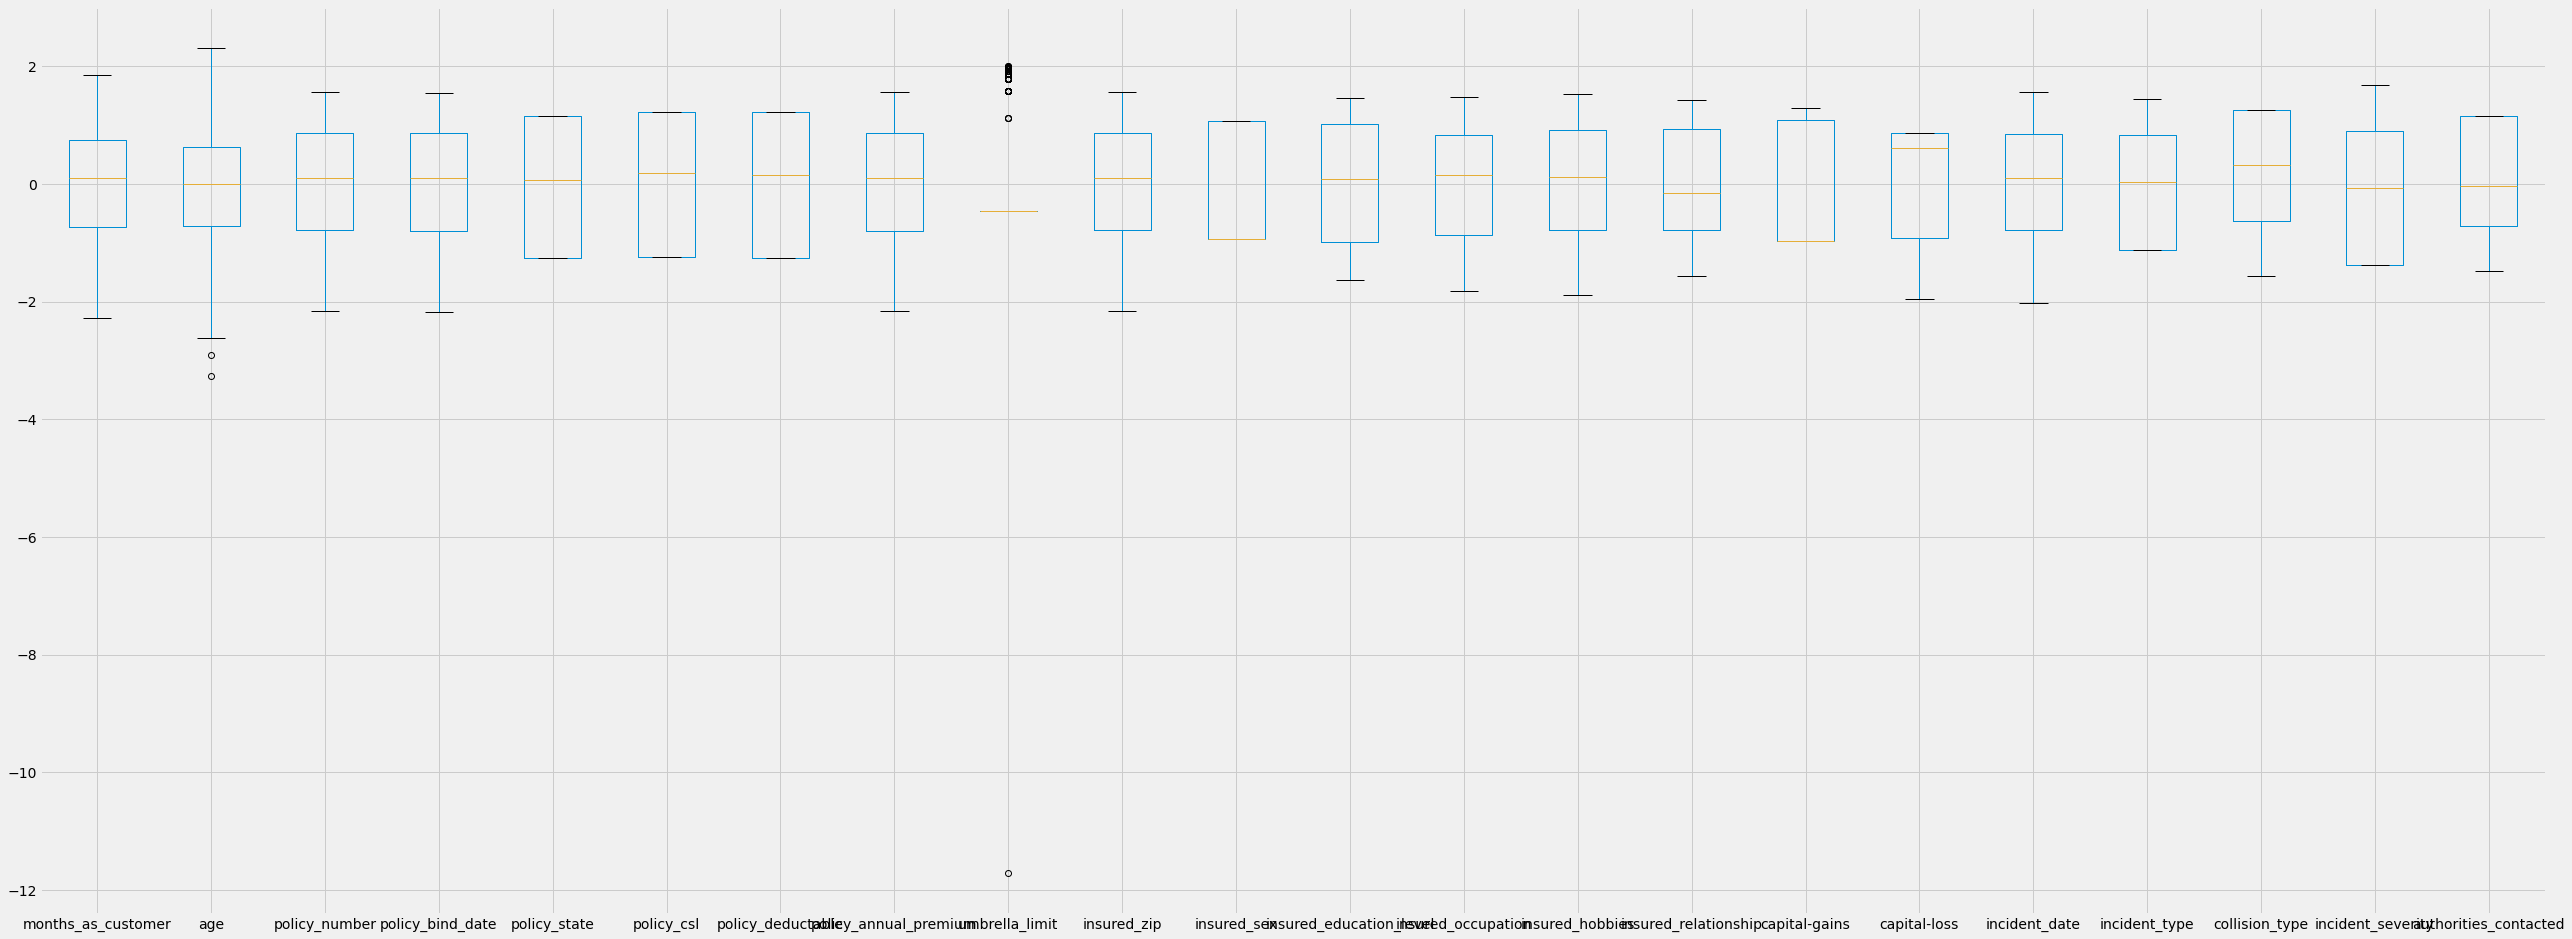

In [35]:
x.iloc[:,0:22].boxplot(figsize=[40,20])
plt.subplots_adjust(bottom=0.25)
plt.show()

# 
Since age,umbrella_limit Age,has present outliers.I have to remove outliers.

In [36]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 262, 314, 430, 458, 503, 657, 700, 875,
        922, 975], dtype=int64),
 array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int64))

In [37]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,299,29,480,532,2,1,1,732,1,486,...,2,2,563,258,512,545,10,1,9,1
1,212,23,257,821,1,1,2,396,5,519,...,0,0,44,46,45,38,8,12,12,1
2,123,10,672,186,2,0,2,740,5,6,...,3,1,143,337,104,116,4,30,12,0
3,239,22,140,766,0,1,2,743,6,812,...,2,1,451,245,249,521,3,34,19,1
4,212,25,286,181,0,2,1,902,6,850,...,1,1,81,70,36,66,0,31,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,19,935,487,2,2,1,577,1,19,...,1,0,705,624,379,664,6,6,11,0
996,266,22,101,129,0,0,1,765,1,813,...,3,0,760,630,608,714,13,28,20,0
997,119,15,902,509,2,1,0,691,3,181,...,3,2,507,324,330,554,11,19,1,0
998,377,43,500,573,0,2,2,652,5,157,...,1,2,224,168,170,256,1,5,3,0


# 
This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

In [38]:
df_new_z.shape

(985, 39)

In [39]:
data_loss = (1000-985)/1000*100
data_loss

1.5

# 
Using Zscore i have 1.5% data loss.Which is less than 10%

In [40]:
y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

# 
Here we can notice the class imbalancing issue so lets use SMOTE to balance the data

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [43]:
y.value_counts()

0    753
1    753
Name: fraud_reported, dtype: int64

# 
The data is balanced now, Since the highest count of the target is 753 so the data is balanced by oversampling all the classes to the count 753.

In [44]:
df_new_z.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,299,29,480,532,2,1,1,732,1,486,...,2,2,563,258,512,545,10,1,9,1
1,212,23,257,821,1,1,2,396,5,519,...,0,0,44,46,45,38,8,12,12,1
2,123,10,672,186,2,0,2,740,5,6,...,3,1,143,337,104,116,4,30,12,0
3,239,22,140,766,0,1,2,743,6,812,...,2,1,451,245,249,521,3,34,19,1
4,212,25,286,181,0,2,1,902,6,850,...,1,1,81,70,36,66,0,31,14,0


In [45]:
maxAccu=0
maxRS=0
for i in range(0,21):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state =i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS) 

Best accuracy is 0.7913907284768212 on Random_state 15


In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .20, random_state = 15)

# 
We have created a new train test split using Random State

In [67]:
R = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print("Accuracy",accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 79.13907284768213
[[120  27]
 [ 36 119]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       147
           1       0.82      0.77      0.79       155

    accuracy                           0.79       302
   macro avg       0.79      0.79      0.79       302
weighted avg       0.79      0.79      0.79       302



#
The accuracy using Logistic Regression Classifier is 79.1390%

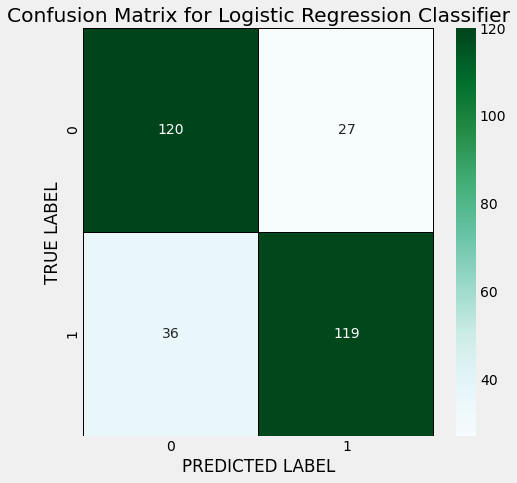

In [68]:
cm = confusion_matrix(y_test,predlr)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()


In [69]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print("Accuracy",accuracy_score(y_test, preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 83.44370860927152
[[116  31]
 [ 19 136]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       147
           1       0.81      0.88      0.84       155

    accuracy                           0.83       302
   macro avg       0.84      0.83      0.83       302
weighted avg       0.84      0.83      0.83       302



# 
The accuracy by using Decision Tree Classifier is 83.44%

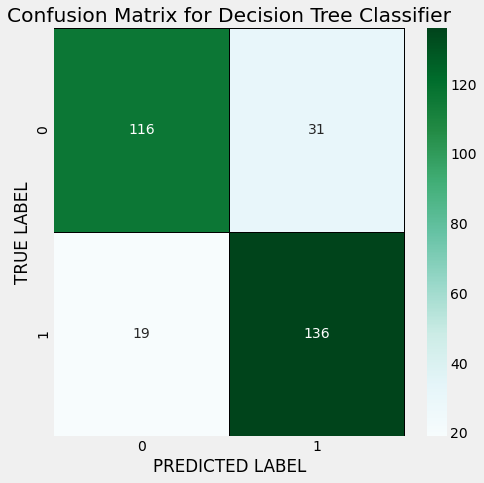

In [70]:
cm = confusion_matrix(y_test,preddt)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [71]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print("Accuracy",accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 89.40397350993378
[[133  14]
 [ 18 137]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       147
           1       0.91      0.88      0.90       155

    accuracy                           0.89       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.89      0.89      0.89       302



# 
The accuracy by using Random Forest Classifier is 89.40%

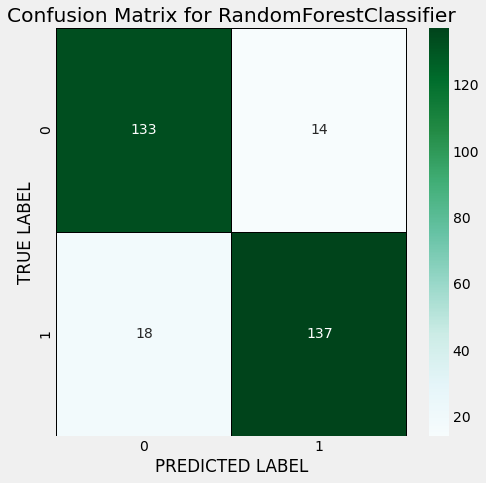

In [72]:
cm = confusion_matrix(y_test,predrf)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [73]:
svc = SVC()
svc.fit(x_train,y_train)

ad_pred = svc.predict(x_test)
print("Accuracy",accuracy_score(y_test, ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy 90.06622516556291
[[131  16]
 [ 14 141]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       147
           1       0.90      0.91      0.90       155

    accuracy                           0.90       302
   macro avg       0.90      0.90      0.90       302
weighted avg       0.90      0.90      0.90       302



# 
The accuracy using SVC is 90.066%

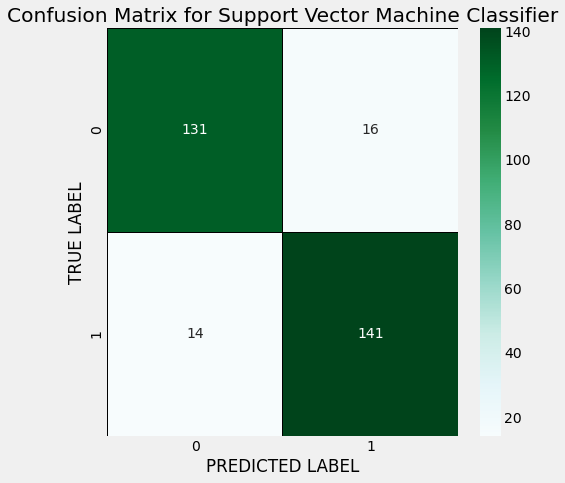

In [74]:
cm = confusion_matrix(y_test,ad_pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

In [75]:
scr=cross_val_score(LR, x, y, cv=5)
print("cross validation score of Logistic Regression model :",scr.mean())

cross validation score of Logistic Regression model : 0.740377549448857


In [76]:
scr=cross_val_score(rf, x, y, cv=5)
print("cross validation score of Random Forest model :",scr.mean())

cross validation score of Random Forest model : 0.8832038899034125


In [77]:
scr=cross_val_score(svc, x, y, cv=5)
print("cross validation score of SVC model :",scr.mean())

cross validation score of SVC model : 0.8851598424677125


In [78]:
parameters = {'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth' : [4,5,6,7,8],
             'criterion' :['gini' , 'entropy']}

In [79]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}

In [80]:
Final_mod=DecisionTreeClassifier(criterion='entropy',max_depth=39, max_features='log2')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

74.83443708609272


In [81]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.9072847682119205

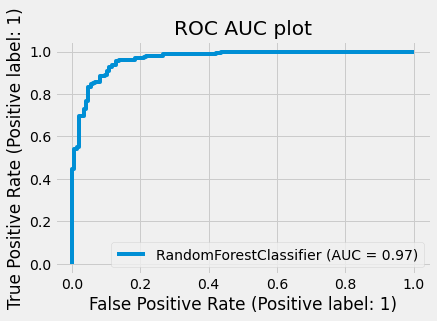

In [82]:
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

# 
This is the AUC-ROC curve for the models taht we have used and is plotted False positive rate against True positive rate.

In [83]:
import joblib 
joblib.dump(GCV.best_estimator_,"Insurancefraud.pkl")

['Insurancefraud.pkl']

In [84]:
model=joblib.load("Insurancefraud.pkl")


prediction = model.predict(x_test)
prediction

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,

In [85]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
297,1,1
298,0,0
299,0,0
300,0,0


# 
We can observe both original and predicted values are same. That means the loan approval status for both predicted and original are same